# Written by Ivan Istomin BPI154
## 2 variant

### Задание
В таблице с данными содержатся координаты x и y точек некоторого изображения (давайте считать, что это обработанное фото трёх монеток с зашумлением). Примените к данным вашего варианта метод k-средних, перебирая число кластеров k = 2, 3, 4. Для каждого k изобразите полученное разбиение на графике, выделяя кластеры разными цветами. По графикам оцените, насколько удалось распознать образы монеток.

### Решение
Данные для 2 варианта задания:

In [2]:
from pylab import plot, show
from numpy import column_stack, array
from scipy.cluster.vq import kmeans, vq

# Data
x = [70, 88, 37, 94, 51, 84, 68, 29, 2, 41, 15, 77, 94, 28, 95, 12, 83, 21, 22, 23, 24, 19, 20, 21, 22, 23, 24, 25,
     26, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 96, 17, 18, 19, 20, 21, 22,
     23, 24, 25, 26, 27, 28, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
     27, 28, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 18, 19, 20, 21,
     22, 23, 24, 25, 26, 27, 53, 54, 19, 20, 21, 22, 23, 24, 25, 26, 76, 21, 22, 23, 24, 9, 61, 13, 35, 85, 0, 25, 70,
     79, 23, 43, 4, 57, 30, 35, 89, 90, 91, 33, 87, 88, 89, 90, 91, 92, 93, 75, 86, 87, 88, 89, 90, 91, 92, 93, 94, 85,
     86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 82, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 84, 85, 86, 87, 88, 89,
     90, 91, 92, 93, 94, 95, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
     95, 6, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 86, 87, 89, 90, 91,
     92, 93, 94, 87, 88, 89, 90, 91, 92, 46, 30, 4, 56, 57, 58, 59, 60, 61, 55, 56, 57, 58, 59, 60, 61, 62, 54, 55,
     56, 57, 58, 59, 60, 61, 62, 63, 88, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 3, 53, 54, 55, 56, 57, 58,
     59, 60, 61, 62, 63, 64, 15, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 26, 53, 54, 55, 56, 57, 58, 59, 60,
     61, 62, 63, 64, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64]
y = [0, 0, 2, 2, 3, 4, 5, 6, 7, 7, 9, 10, 10, 11, 12, 17, 22, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35,
     35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37,
     37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40,
     40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42,
     42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 46, 46, 47, 48, 50, 52, 52, 52, 56, 59,
     62, 63, 64, 67, 69, 72, 72, 72, 73, 73, 73, 73, 73, 73, 73, 73, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 75,
     75, 75, 75, 75, 75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 77, 77, 77, 77, 77, 77, 77,
     77, 77, 77, 77, 77, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
     80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 82, 82, 82, 82, 82, 82,
     82, 82, 83, 83, 83, 83, 83, 83, 85, 87, 91, 92, 92, 92, 92, 92, 92, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 94,
     94, 94, 94, 94, 94, 94, 94, 94, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 96, 96, 96, 96, 96, 96, 96, 96,
     96, 96, 96, 96, 96, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98,
     98, 98, 98, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99]

### Для K = 2 (два кластера)

Приведем наши данные в вид [[x, y], [еще одна точка], ...], найдем центры кластеров (группы) и приравняем наши точки к ним:

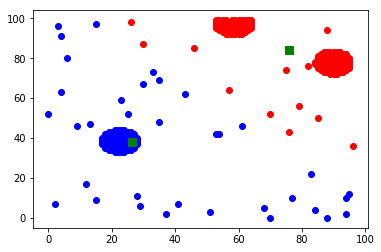

In [4]:
# Change data format
data = column_stack((x, y))

# Computing K-Means with K = 2 (2 clusters)
centroids,_ = kmeans(data.astype(float), 2)

# Assign each sample to a cluster
idx,_ = vq(data, centroids)

# Some plotting using numpy's logical indexing
plot(data[idx == 0,0], data[idx == 0,1], 'ob',
     data[idx == 1,0], data[idx == 1,1], 'or')

plot(centroids[:,0], centroids[:,1], 'sg', markersize = 8)

show()

### Для K = 3 (три группы)

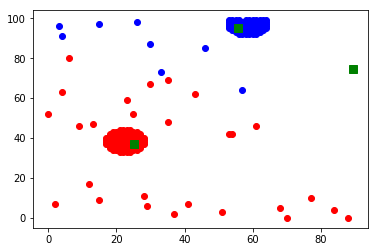

In [5]:
# Computing K-Means with K = 3 (3 clusters)
centroids,_ = kmeans(data.astype(float), 3)

# Assign each sample to a cluster
idx,_ = vq(data, centroids)

# Some plotting using numpy's logical indexing
plot(data[idx == 0,0], data[idx == 0,1], 'ob',
     data[idx == 1,0], data[idx == 1,1], 'or')

plot(centroids[:,0], centroids[:,1], 'sg', markersize = 8)

show()

### Для K = 4 (четыре группы)

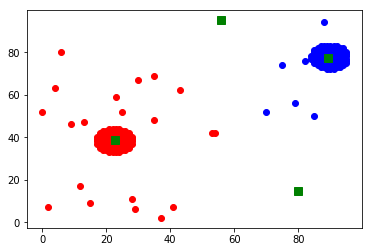

In [6]:
# Computing K-Means with K =4 (4 clusters)
centroids,_ = kmeans(data.astype(float), 4)

# Assign each sample to a cluster
idx,_ = vq(data, centroids)

# Some plotting using numpy's logical indexing
plot(data[idx == 0,0], data[idx == 0,1], 'ob',
     data[idx == 1,0], data[idx == 1,1], 'or')

plot(centroids[:,0], centroids[:,1], 'sg', markersize = 8)

show()

### Итог

Разбив на 2 кластера наши данные мы можем увидеть все три монетки, разбив на 3, уже только две, на 4 тоже только 2.
Отчетливо видно, что данные хорошо рабиваются на два кластера (группы).